# Project 3: Ensemble Techniques
## Submitted by: Kingshuk Banerjee
#### Attribute information
#### Input variables:
#### Bank client data:
#### 1. age: Continuous feature
#### 2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
#### 3. marital: marital status (married, single, divorced)
#### 4. education: education level (primary, secondary, tertiary)
#### 5. default: has credit in default?
#### 6. housing: has housing loan?
#### 7. loan: has personal loan?
#### 8. balance in account
#### Related to previous contact:
#### 9. contact: contact communication type
#### 10. month: last contact month of year
#### 11. day: last contact day of the month
#### 12. duration: last contact duration, in seconds*
#### Other attributes:
#### 13. campaign: number of contacts performed during this campaign and for this client
#### 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
#### 15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
#### 16. poutcome: outcome of the previous marketing campaign
#### Output variable (desired target):
#### 17. Target: Tell us has the client subscribed a term deposit. (Yes, No)
 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('bank-full.csv')

In [3]:
data.shape

(45211, 17)

In [4]:
data.head(20)

age           job   marital  education default  balance housing loan  \
0    58    management   married   tertiary      no     2143     yes   no   
1    44    technician    single  secondary      no       29     yes   no   
2    33  entrepreneur   married  secondary      no        2     yes  yes   
3    47   blue-collar   married    unknown      no     1506     yes   no   
4    33       unknown    single    unknown      no        1      no   no   
5    35    management   married   tertiary      no      231     yes   no   
6    28    management    single   tertiary      no      447     yes  yes   
7    42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8    58       retired   married    primary      no      121     yes   no   
9    43    technician    single  secondary      no      593     yes   no   
10   41        admin.  divorced  secondary      no      270     yes   no   
11   29        admin.    single  secondary      no      390     yes   no   
12   53    technician   married  secondary      no        6     yes   no   
13   58    technician   married    unknown      no       71     yes   no   
14   57      services   married  secondary      no      162     yes   no   
15   51       retired   married    primary      no      229     yes   no   
16   45        admin.    single    unknown      no       13     yes   no   
17   57   blue-collar   married    primary      no       52     yes   no   
18   60       retired   married    primary      no       60     yes   no   
19   33      services   married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome Target  
0   unknown    5   may       261         1     -1         0  unknown     no  
1   unknown    5   may       151         1     -1         0  unknown     no  
2   unknown    5   may        76         1     -1         0  unknown     no  
3   unknown    5   may        92         1     -1         0  unknown     no  
4   unknown    5   may       198         1     -1         0  unknown     no  
5   unknown    5   may       139         1     -1         0  unknown     no  
6   unknown    5   may       217         1     -1         0  unknown     no  
7   unknown    5   may       380         1     -1         0  unknown     no  
8   unknown    5   may        50         1     -1         0  unknown     no  
9   unknown    5   may        55         1     -1         0  unknown     no  
10  unknown    5   may       222         1     -1         0  unknown     no  
11  unknown    5   may       137         1     -1         0  unknown     no  
12  unknown    5   may       517         1     -1         0  unknown     no  
13  unknown    5   may        71         1     -1         0  unknown     no  
14  unknown    5   may       174         1     -1         0  unknown     no  
15  unknown    5   may       353         1     -1         0  unknown     no  
16  unknown    5   may        98         1     -1         0  unknown     no  
17  unknown    5   may        38         1     -1         0  unknown     no  
18  unknown    5   may       219         1     -1         0  unknown     no  
19  unknown    5   may        54         1     -1         0  unknown     no

In [5]:
data.columns

Index([&#39;age&#39;, &#39;job&#39;, &#39;marital&#39;, &#39;education&#39;, &#39;default&#39;, &#39;balance&#39;, &#39;housing&#39;,
       &#39;loan&#39;, &#39;contact&#39;, &#39;day&#39;, &#39;month&#39;, &#39;duration&#39;, &#39;campaign&#39;, &#39;pdays&#39;,
       &#39;previous&#39;, &#39;poutcome&#39;, &#39;Target&#39;],
      dtype=&#39;object&#39;)

### See the no. of unique values of some of the columns

In [6]:
data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous', 'poutcome', 'day', 'duration', 'pdays', 'previous', 'Target']].nunique()

age            77
job            12
marital         3
education       4
default         2
housing         2
loan            2
contact         3
campaign       48
previous       41
poutcome        4
day            31
duration     1573
pdays         559
previous       41
Target          2
dtype: int64

In [7]:
data.describe().transpose()

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

### Observation - 
### The balance range goes into negative. 
### The previous mean is very close to 0 and the IQR is 0.0. The max however shows there are outliers.

In [8]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

### The day is the day of the month so it should be converted to a categorical variable

In [9]:
data['day'] = data['day'].apply(str)
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day          object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

## Check missing or null values

In [10]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

### Observation - 
### There are no missing values but there are outliers and invalid values.

## Lets look at the distribution of continuous variables

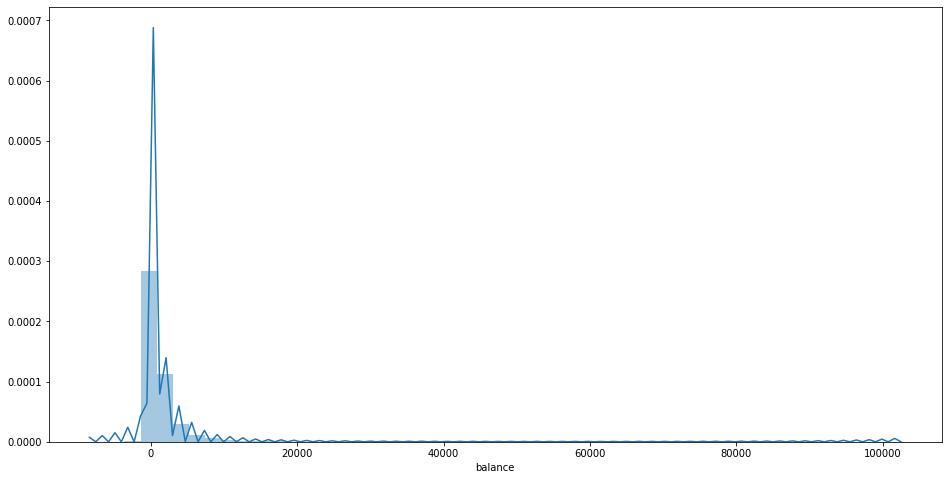

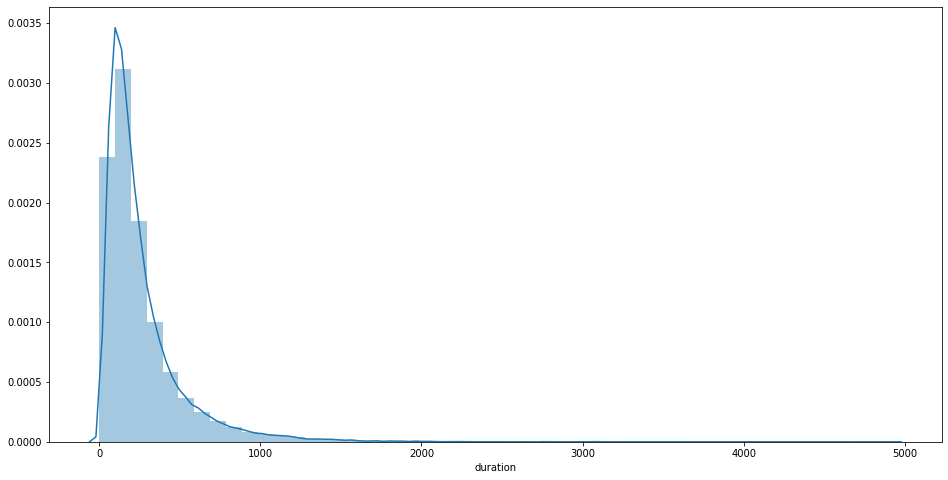

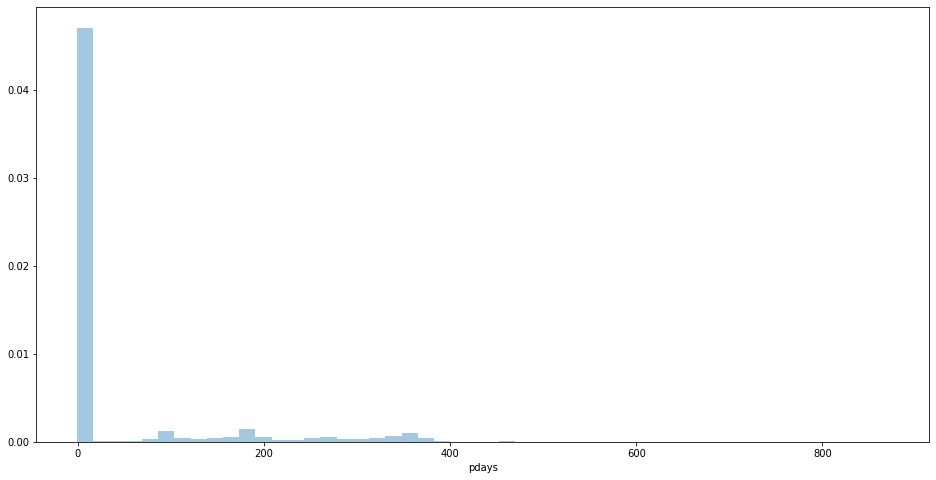

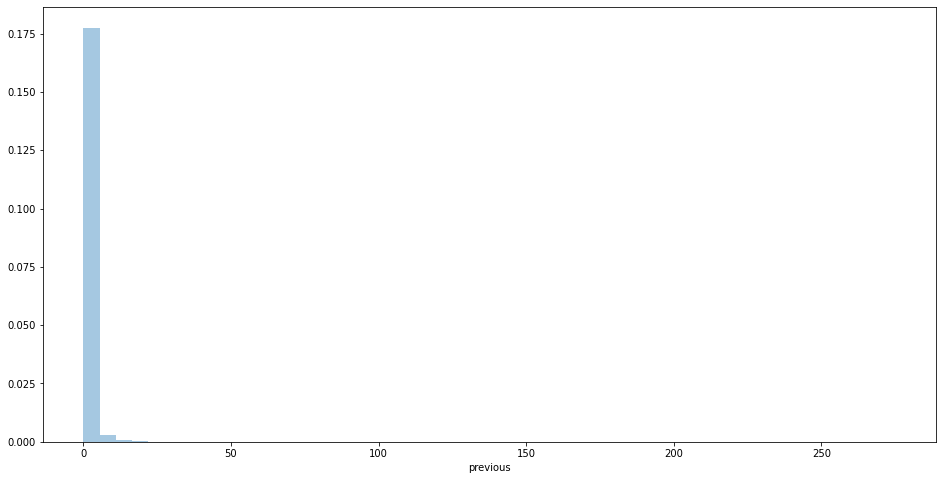

In [11]:
cont_cols = list()
for col in data.columns:
    if data[col].dtype == 'int64':
        cont_cols.append(col)
        plt.figure(figsize=(16, 8))
        sns.distplot(data[col])
        plt.show()

### Observation -
### From the distributions, it seems most of the continuous data has a skewed normal distribution.
### The long tails show presence of outliers. 

## Looking at boxplots to check outliers

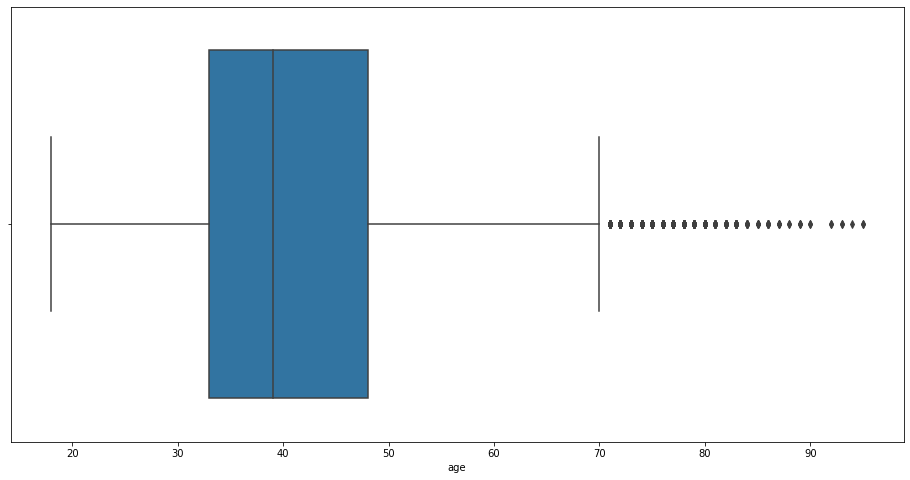

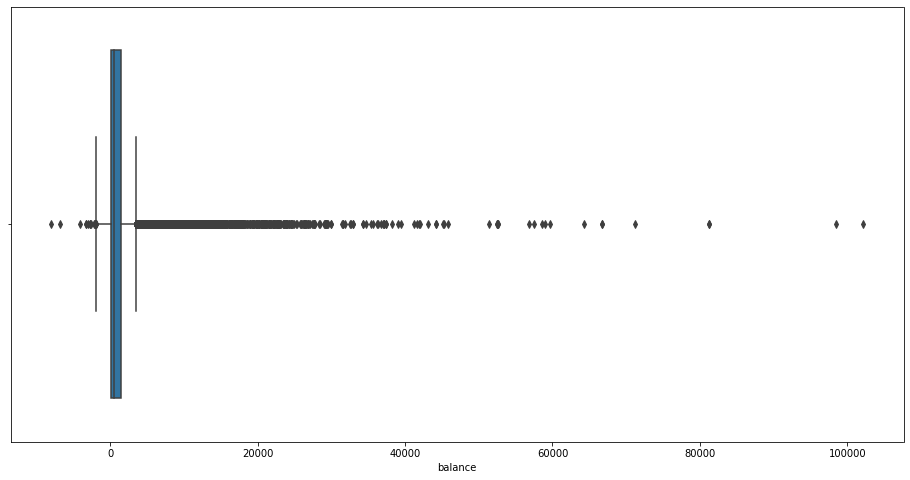

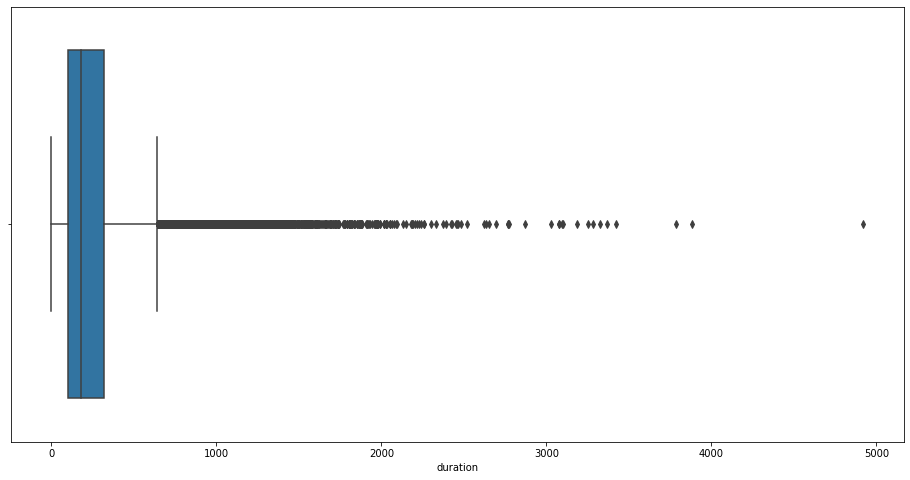

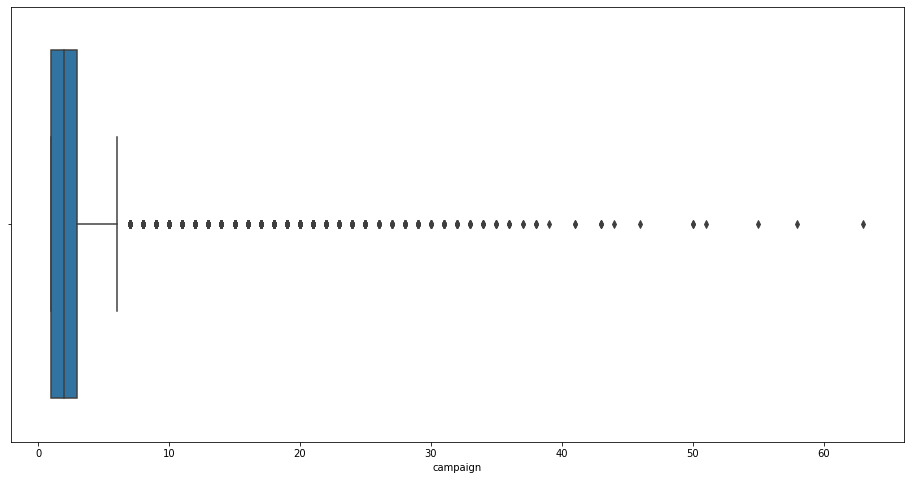

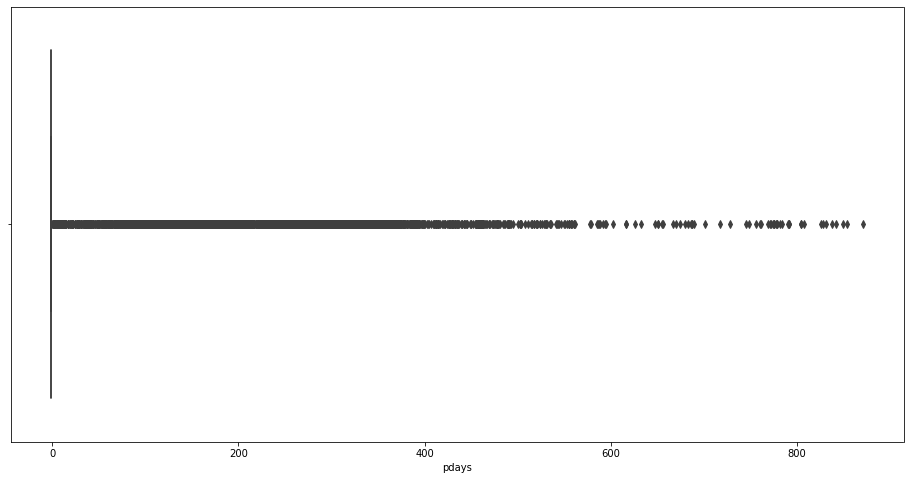

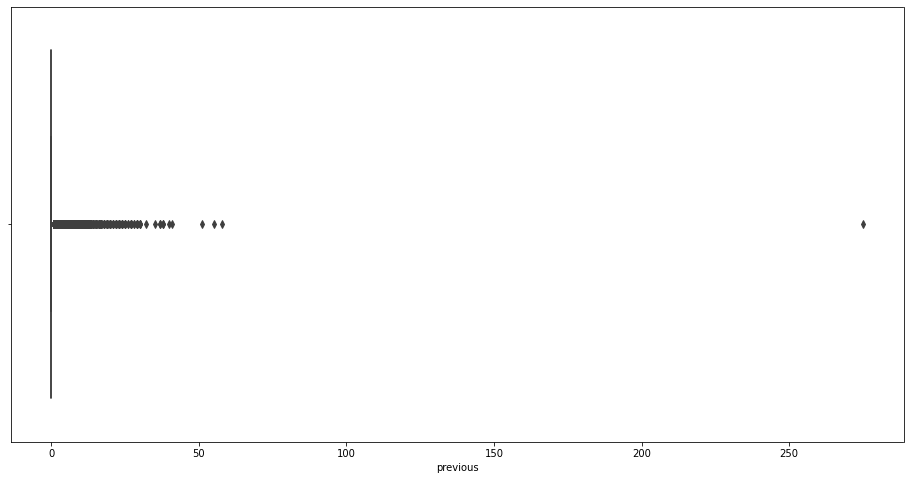

In [12]:
for col in data.columns:
    if data[col].dtype == 'int64':
        plt.figure(figsize=(16, 8))
        sns.boxplot(data[col])
        plt.show()

### Let us check how many customers are marked with negative balance.

In [13]:
neg_balance = data[data['balance'] < 0]
neg_balance

age          job   marital  education default  balance housing loan  \
25      44       admin.   married  secondary      no     -372     yes   no   
28      46   management    single  secondary      no     -246     yes   no   
36      25  blue-collar   married  secondary      no       -7     yes   no   
37      53   technician   married  secondary      no       -3      no   no   
45      36       admin.    single    primary      no     -171     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
44626   31     services    single  secondary      no     -205      no   no   
44629   28  blue-collar    single  secondary      no      -46     yes   no   
44836   33  blue-collar   married    primary      no     -195      no   no   
44908   48   management  divorced   tertiary      no     -130     yes   no   
44964   21  blue-collar    single    primary      no      -42      no   no   

        contact day month  duration  campaign  pdays  previous poutcome Target  
25      unknown   5   may       172         1     -1         0  unknown     no  
28      unknown   5   may       255         2     -1         0  unknown     no  
36      unknown   5   may       365         1     -1         0  unknown     no  
37      unknown   5   may      1666         1     -1         0  unknown     no  
45      unknown   5   may       242         1     -1         0  unknown     no  
...         ...  ..   ...       ...       ...    ...       ...      ...    ...  
44626  cellular   1   sep       481         1    579         1  failure    yes  
44629  cellular   1   sep       199         1     92        14  success    yes  
44836   unknown  20   sep         9         1     -1         0  unknown     no  
44908  cellular  29   sep       110         2     61         9  failure     no  
44964   unknown  10   oct         5         1     -1         0  unknown     no  

[3766 rows x 17 columns]

&lt;matplotlib.axes._subplots.AxesSubplot at 0x12b535128&gt;

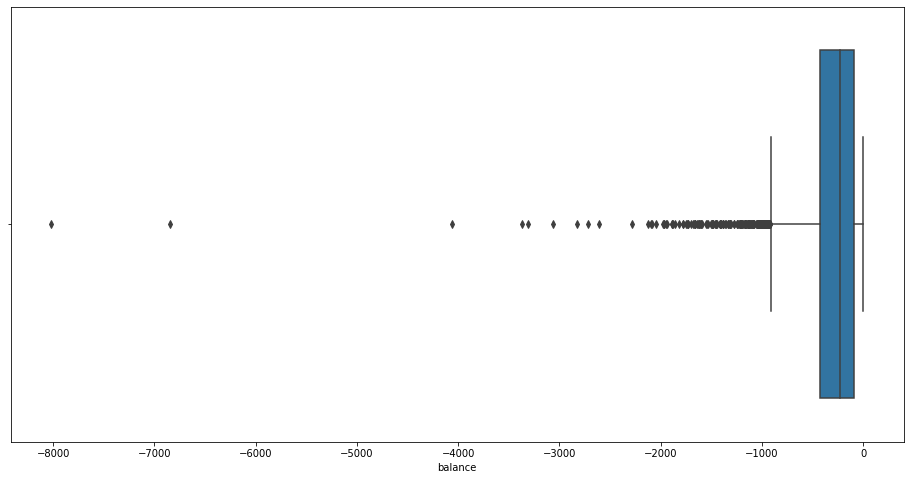

In [14]:
plt.figure(figsize=(16, 8))
sns.boxplot(neg_balance['balance'])

### Most of the values are closer to 0.0 but these negative values could mean overdraft accounts. 
### These could be a good indicator of term deposit eligibility. 
### Hence we will keep the negative balances.

### Below we will print the outlier values for each predictor and compare them to the IQR


In [15]:
def get_outlier_stats(data, col, rowmask, stats):
    q25, q75 = np.percentile(data[col], 25), np.percentile(data[col], 75)
    iqr = q75 - q25
    min = np.min(data[col])
    max = np.max(data[col])
    lower = np.max([q25 - iqr*1.5, min])
    upper = np.min([q75 + iqr*1.5, max])
    #print("{} : 25%: {} 75%: {} IQR: {} Lower: {} Upper: {}".format(col, q25, q75, iqr, lower, upper))
    arr = data[col].values
    outliers = [x for x in arr if (x < lower or x > upper)]
    for i in range(len(arr)):
        if (arr[i] < lower or arr[i] > upper):
            rowmask[i] = True
    #print("No. of outlier rows: {}".format(np.count_nonzero(rowmask)))
    #print("{}: Outliers: {}".format(col, outliers))
    #print("{}: Outlier percentage: {}%".format(col, round(len(outliers)*100.0/len(arr), 2)))
    stats[col] = [q25, q75, iqr, lower, upper, len(outliers), round(len(outliers)*100.0/len(arr), 2)]

In [16]:
rowmask = [False for x in range(data.shape[0])]
#print(len(rowmask))
stats = dict()
for col in cont_cols:
    get_outlier_stats(data, col, rowmask, stats)
print("Total no. of outlier rows: {}".format(np.count_nonzero(rowmask)))
outliers = pd.DataFrame.from_dict(stats, orient='index', columns=['25 Percentile', '75 Percentile', 'IQR', 'Lower', 'Upper', 'Outliers', 'Outlier Percentage'])
outliers

Total no. of outlier rows: 17018


25 Percentile  75 Percentile     IQR   Lower   Upper  Outliers  \
age                33.0           48.0    15.0    18.0    70.5       487   
balance            72.0         1428.0  1356.0 -1962.0  3462.0      4729   
duration          103.0          319.0   216.0     0.0   643.0      3235   
campaign            1.0            3.0     2.0     1.0     6.0      3064   
pdays              -1.0           -1.0     0.0    -1.0    -1.0      8257   
previous            0.0            0.0     0.0     0.0     0.0      8257   

          Outlier Percentage  
age                     1.08  
balance                10.46  
duration                7.16  
campaign                6.78  
pdays                  18.26  
previous               18.26

### Observation - 
### From the outlier table, we can see that pdays and previous have much higher outlier percentage (18%).
### The balance data also has 10% outliers. 
### One strategy we can take is binning of these data and converting them to Ordinal variable.

### Below we try an automatic outlier detection algorithm.
### It detects the rows with outliers and if there are few, we can remove them.

In [17]:
from sklearn.neighbors import LocalOutlierFactor
data1 = data[cont_cols]
model = LocalOutlierFactor()
yhat = model.fit_predict(data1.values)
print("No. of outlier columns: {}".format(np.count_nonzero(yhat == -1)))
mask = yhat == -1
data1[mask]

No. of outlier columns: 962


age  balance  duration  campaign  pdays  previous
53      42      -76       787         1     -1         0
127     34      -16        78         1     -1         0
150     51      -19       163         2     -1         0
230     47      -12        18         1     -1         0
412     39      -25       576         1     -1         0
...    ...      ...       ...       ...    ...       ...
45139   44      839       240         1     40         2
45146   49      780       148         1    871         2
45159   60     4428       125         1     96         6
45160   35        0       524         1     96         5
45199   34     1475      1166         3    530        12

[962 rows x 6 columns]

### Observation - 
### It detects only 962 rows as outliers whereas our get_outlier_stats() found ~17000 rows with outliers.

### Lets create a dataset by dropping outlier rows detected by LocalOutlierFactor()
### and then run the get_outlier_stats() method again

In [18]:
data2 = data[yhat != -1]
print(data2.shape)
data2.head(10)
data2.describe().transpose()

(44249, 17)


count         mean          std     min    25%    50%     75%  \
age       44249.0    40.852968    10.461926    18.0   33.0   39.0    48.0   
balance   44249.0  1343.892947  2851.113797 -2122.0   77.0  452.0  1422.0   
duration  44249.0   255.146851   249.208571     0.0  103.0  180.0   317.0   
campaign  44249.0     2.723474     2.907677     1.0    1.0    2.0     3.0   
pdays     44249.0    38.419942    96.558131    -1.0   -1.0   -1.0    -1.0   
previous  44249.0     0.546747     1.847315     0.0    0.0    0.0     0.0   

              max  
age          93.0  
balance   59649.0  
duration   3422.0  
campaign     63.0  
pdays       854.0  
previous     58.0

## Run the outlier statistics on the treated data

In [19]:
rowmask = [False for x in range(data2.shape[0])]
#print(len(rowmask))
stats = dict()
for col in cont_cols:
    get_outlier_stats(data2, col, rowmask, stats)
print("Total no. of outlier rows: {}".format(np.count_nonzero(rowmask)))
outliers = pd.DataFrame.from_dict(stats, orient='index', columns=['25 Percentile', '75 Percentile', 'IQR', 'Lower', 'Upper', 'Outliers', 'Outlier Percentage'])
outliers

Total no. of outlier rows: 16250


25 Percentile  75 Percentile     IQR   Lower   Upper  Outliers  \
age                33.0           48.0    15.0    18.0    70.5       385   
balance            77.0         1422.0  1345.0 -1940.5  3439.5      4605   
duration          103.0          317.0   214.0     0.0   638.0      3106   
campaign            1.0            3.0     2.0     1.0     6.0      2914   
pdays              -1.0           -1.0     0.0    -1.0    -1.0      7733   
previous            0.0            0.0     0.0     0.0     0.0      7733   

          Outlier Percentage  
age                     0.87  
balance                10.41  
duration                7.02  
campaign                6.59  
pdays                  17.48  
previous               17.48

### Observation -
### We can see that the outlier percentages are still almost the same. 

### Let us scale the data and check if it improves outliers. 
### Since the range of the columns are very different, scaling will need to be done before fitting the data to a model.

### In the presence of outliers, RobustScaler may perform better as it uses the IQR and median to scale

In [20]:
from sklearn.preprocessing import RobustScaler
X = data[cont_cols].values
transformer = RobustScaler().fit(X)
X_t = transformer.transform(X)
X_t
scaledData = data.copy()
scaledData[cont_cols] = X_t
scaledData.head(20)

age           job   marital  education default   balance housing  \
0   1.266667    management   married   tertiary      no  1.250000     yes   
1   0.333333    technician    single  secondary      no -0.308997     yes   
2  -0.400000  entrepreneur   married  secondary      no -0.328909     yes   
3   0.533333   blue-collar   married    unknown      no  0.780236     yes   
4  -0.400000       unknown    single    unknown      no -0.329646      no   
5  -0.266667    management   married   tertiary      no -0.160029     yes   
6  -0.733333    management    single   tertiary      no -0.000737     yes   
7   0.200000  entrepreneur  divorced   tertiary     yes -0.328909     yes   
8   1.266667       retired   married    primary      no -0.241150     yes   
9   0.266667    technician    single  secondary      no  0.106932     yes   
10  0.133333        admin.  divorced  secondary      no -0.131268     yes   
11 -0.666667        admin.    single  secondary      no -0.042773     yes   
12  0.933333    technician   married  secondary      no -0.325959     yes   
13  1.266667    technician   married    unknown      no -0.278024     yes   
14  1.200000      services   married  secondary      no -0.210914     yes   
15  0.800000       retired   married    primary      no -0.161504     yes   
16  0.400000        admin.    single    unknown      no -0.320796     yes   
17  1.200000   blue-collar   married    primary      no -0.292035     yes   
18  1.400000       retired   married    primary      no -0.286136     yes   
19 -0.400000      services   married  secondary      no -0.330383     yes   

   loan  contact day month  duration  campaign  pdays  previous poutcome  \
0    no  unknown   5   may  0.375000      -0.5    0.0       0.0  unknown   
1    no  unknown   5   may -0.134259      -0.5    0.0       0.0  unknown   
2   yes  unknown   5   may -0.481481      -0.5    0.0       0.0  unknown   
3    no  unknown   5   may -0.407407      -0.5    0.0       0.0  unknown   
4    no  unknown   5   may  0.083333      -0.5    0.0       0.0  unknown   
5    no  unknown   5   may -0.189815      -0.5    0.0       0.0  unknown   
6   yes  unknown   5   may  0.171296      -0.5    0.0       0.0  unknown   
7    no  unknown   5   may  0.925926      -0.5    0.0       0.0  unknown   
8    no  unknown   5   may -0.601852      -0.5    0.0       0.0  unknown   
9    no  unknown   5   may -0.578704      -0.5    0.0       0.0  unknown   
10   no  unknown   5   may  0.194444      -0.5    0.0       0.0  unknown   
11   no  unknown   5   may -0.199074      -0.5    0.0       0.0  unknown   
12   no  unknown   5   may  1.560185      -0.5    0.0       0.0  unknown   
13   no  unknown   5   may -0.504630      -0.5    0.0       0.0  unknown   
14   no  unknown   5   may -0.027778      -0.5    0.0       0.0  unknown   
15   no  unknown   5   may  0.800926      -0.5    0.0       0.0  unknown   
16   no  unknown   5   may -0.379630      -0.5    0.0       0.0  unknown   
17   no  unknown   5   may -0.657407      -0.5    0.0       0.0  unknown   
18   no  unknown   5   may  0.180556      -0.5    0.0       0.0  unknown   
19   no  unknown   5   may -0.583333      -0.5    0.0       0.0  unknown   

   Target  
0      no  
1      no  
2      no  
3      no  
4      no  
5      no  
6      no  
7      no  
8      no  
9      no  
10     no  
11     no  
12     no  
13     no  
14     no  
15     no  
16     no  
17     no  
18     no  
19     no

## Running outlier analysis after scaling

In [21]:
rowmask = [False for x in range(scaledData.shape[0])]
#print(len(rowmask))
stats = dict()
for col in cont_cols:
    get_outlier_stats(scaledData, col, rowmask, stats)
print("Total no. of outlier rows: {}".format(np.count_nonzero(rowmask)))
outliers = pd.DataFrame.from_dict(stats, orient='index', columns=['25 Percentile', '75 Percentile', 'IQR', 'Lower', 'Upper', 'Outliers', 'Outlier Percentage'])
outliers

Total no. of outlier rows: 17018


25 Percentile  75 Percentile  IQR     Lower     Upper  Outliers  \
age           -0.400000       0.600000  1.0 -1.400000  2.100000       487   
balance       -0.277286       0.722714  1.0 -1.777286  2.222714      4729   
duration      -0.356481       0.643519  1.0 -0.833333  2.143519      3235   
campaign      -0.500000       0.500000  1.0 -0.500000  2.000000      3064   
pdays          0.000000       0.000000  0.0  0.000000  0.000000      8257   
previous       0.000000       0.000000  0.0  0.000000  0.000000      8257   

          Outlier Percentage  
age                     1.08  
balance                10.46  
duration                7.16  
campaign                6.78  
pdays                  18.26  
previous               18.26

### Observation - 
### We can see that the data is scaled by IQR (=1.0) but the outliers remain.

## Conclusion of outlier analysis
### 1. pdays, previous and balance have high number of outliers.
### 2. Setting the outliers to median may not be right, since these are real scenarios and high in percentage.
### 3. age has very small outlier percentage which is expected, few very young or very old customers. 
### 4. duration : This is the total time spent with the contact. This should have been Gaussian but we will leave it here. Later we can try binning approach to make it Ordinal.
### 5. campaign : This can also be made Ordinal since no. of times contacted can be binned.

## Bivariate analysis

### Checking correlation of the continuous variables

&lt;matplotlib.axes._subplots.AxesSubplot at 0x12da79a20&gt;

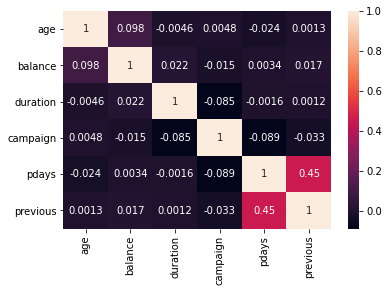

In [22]:
corr = data.corr()
sns.heatmap(corr, annot=True)

### There are no significant correlation among the continuous variables. Highest is 0.45.
### The 0.45 (pdays, previous) probably reflects that if a customer was contacted more no. of times, he is not contacted for a long time again. He may have been converted or determined to be a low prospect.

## Looking at the categorical variables using countplots

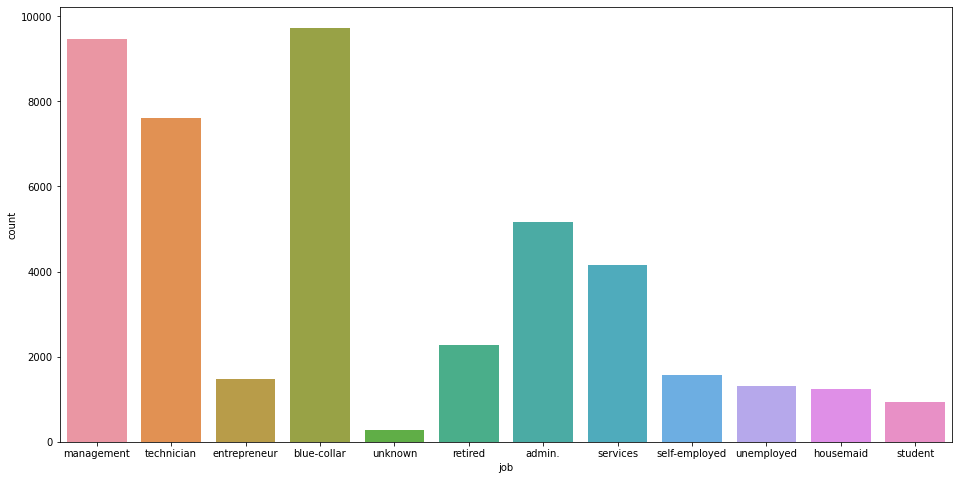

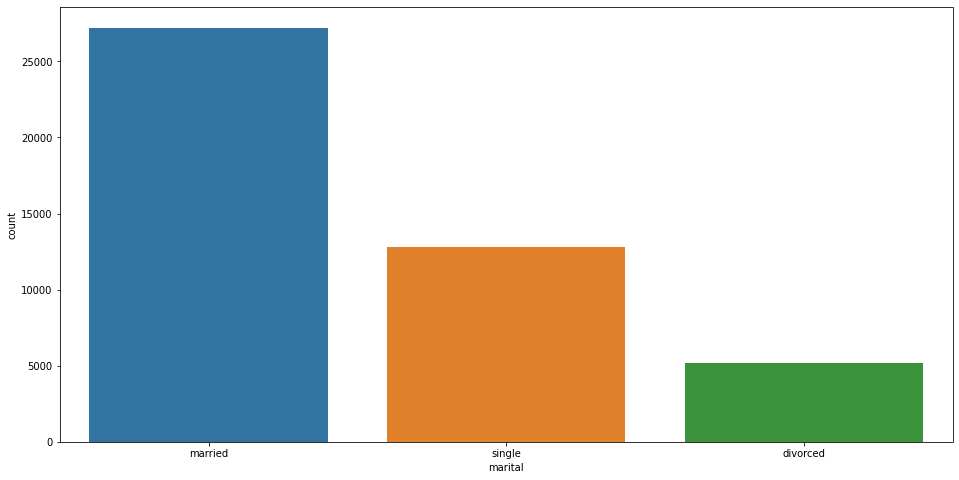

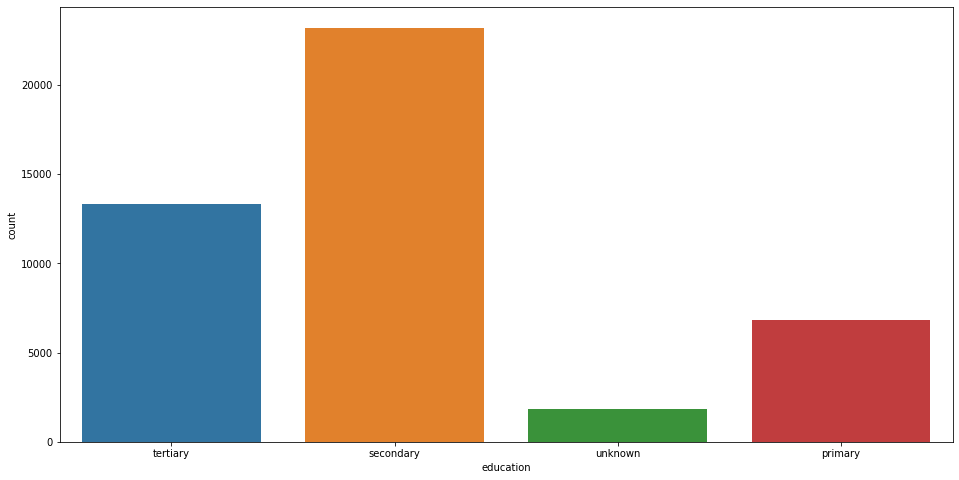

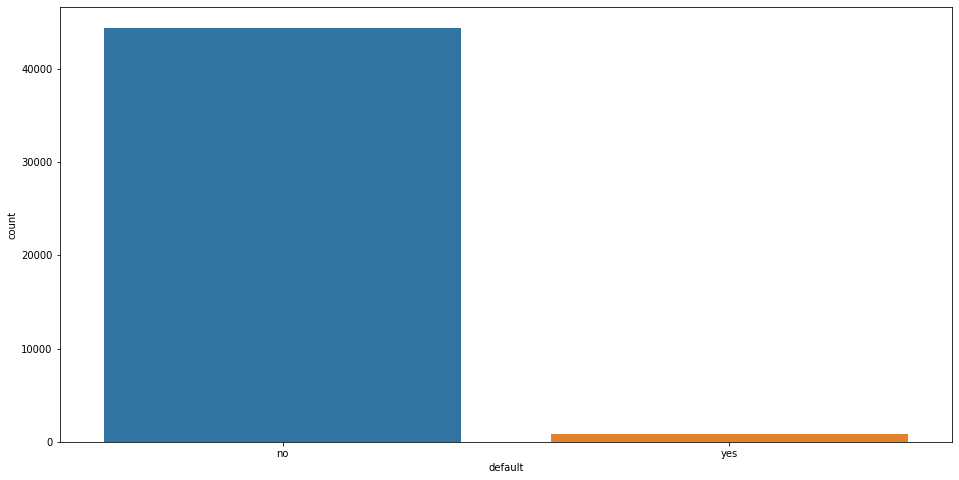

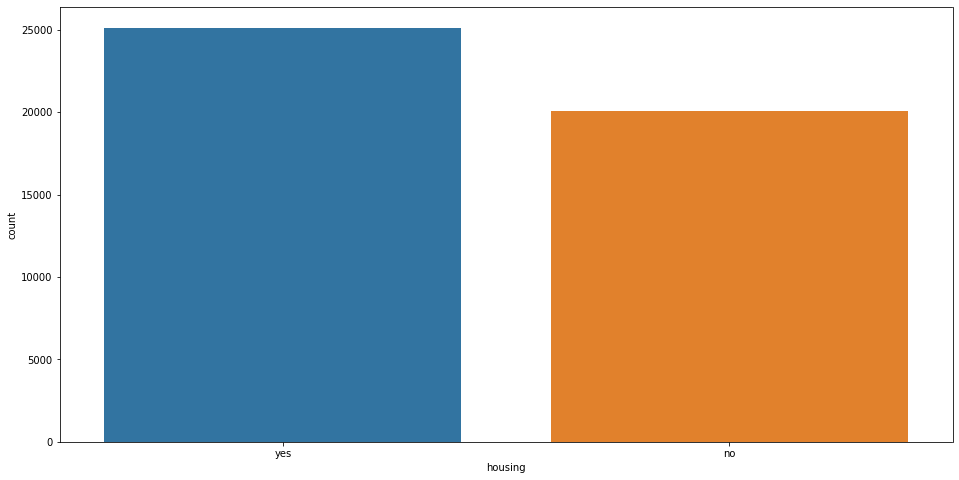

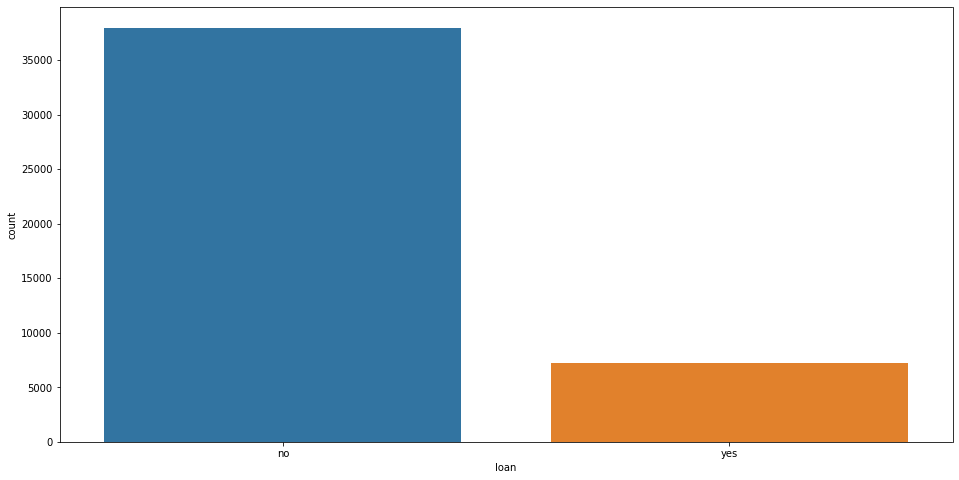

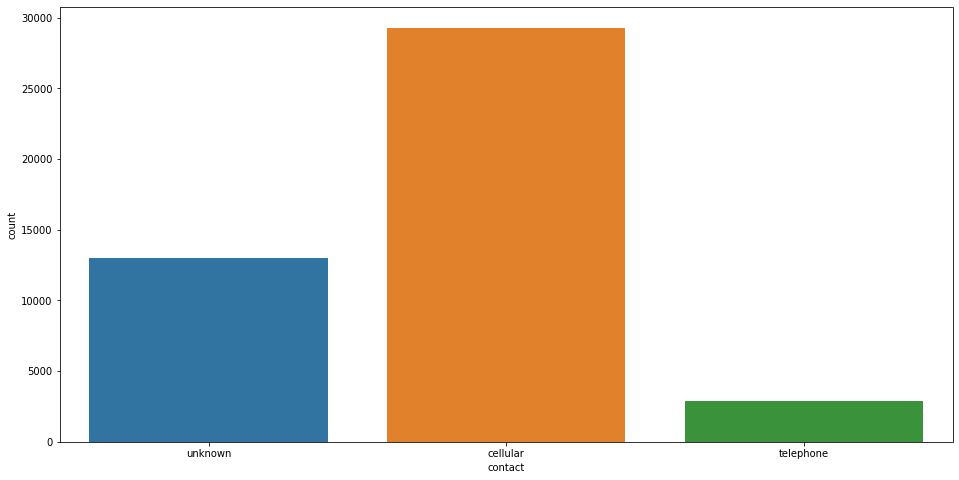

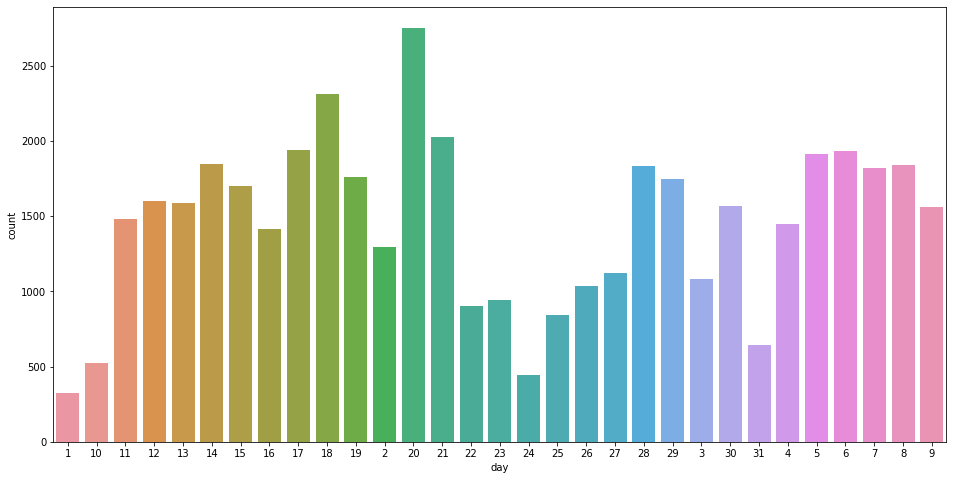

In [23]:
cat_cols = list()
for col in data.columns:
    if data[col].dtype == 'object':
        cat_cols.append(col)
        plt.figure(figsize=(16, 8))
        sns.countplot(data[col])
        plt.show()

In [24]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day          object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

## Look at the value count distributions of the categorical variables

In [25]:
data['day'] = data['day'].astype('category')
for col in cat_cols:
    print("--- {} ----- ".format(col))
    print(data[col].value_counts())

--- job ----- 
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--- marital ----- 
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--- education ----- 
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
--- default ----- 
no     44396
yes      815
Name: default, dtype: int64
--- housing ----- 
yes    25130
no     20081
Name: housing, dtype: int64
--- loan ----- 
no     37967
yes     7244
Name: loan, dtype: int64
--- contact ----- 
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
--- day ----- 
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15   

### Observation -
### From the countplots and the value_counts, there are some unknowns for most of the variables but that seems to be a valid value according to the dataset collection. So we wil leave them as it is as a category, and let the model handle it. 

## Bivariate plots and analysis of categorical values

## 1. Bank client attributes vs. Target

In [26]:
client_data_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']
target = ['Target']
print(data['Target'].value_counts(normalize=True))
for col in client_data_cols:
    print("--------{}----------".format(col))
    print(pd.crosstab(data[col], data['Target'], normalize='index'))

no     0.883015
yes    0.116985
Name: Target, dtype: float64
--------job----------
Target               no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056
--------marital----------
Target          no       yes
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492
--------education----------
Target           no       yes
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064
unknown    0.864297  0.135703
--------default----------
Target         no       yes
default 

### Observation -
### The distribution seems to affected by all. 
### However the marital status seems to have least effect (85-88% no, 11-15% yes)
### We can remove marital status but we will leave it now.

### Lets observe the same data visually.

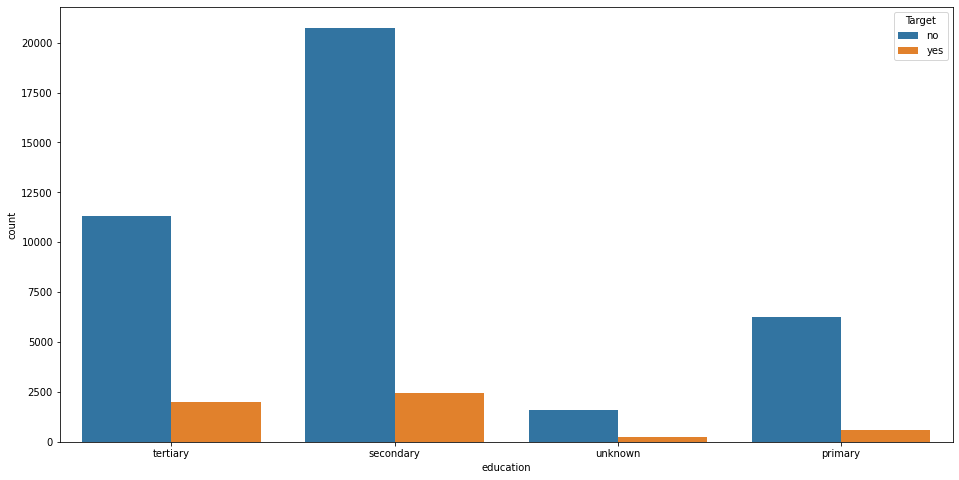

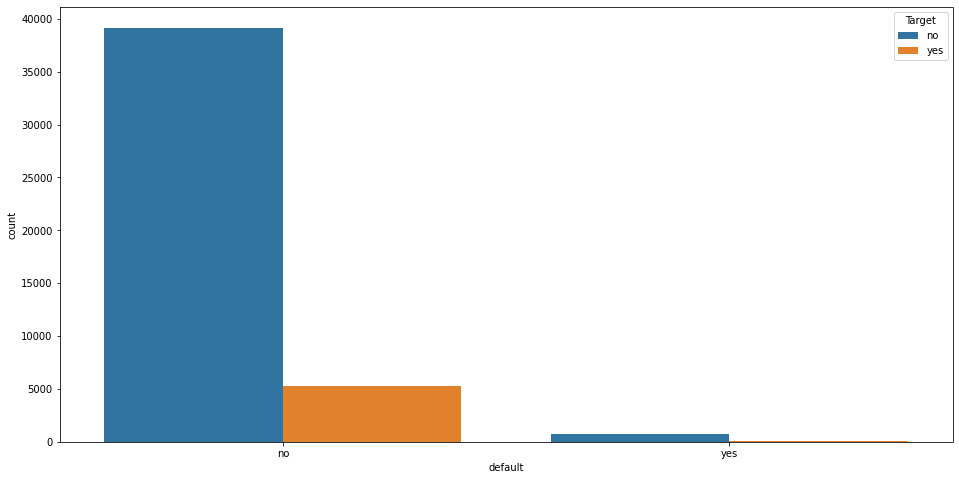

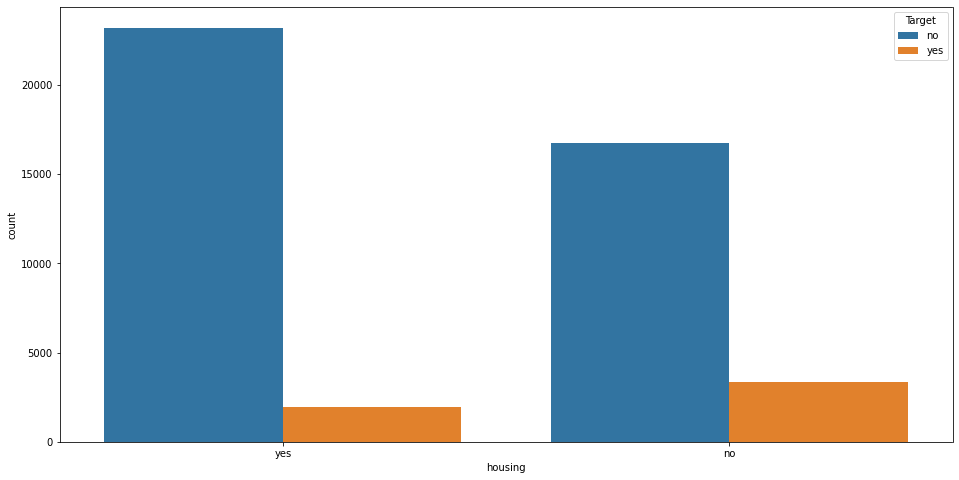

In [27]:
for col in client_data_cols:
    plt.figure(figsize=(16, 8))
    sns.countplot(data[col], hue=data['Target'])
    plt.show()

### Observations on the client attributes to the Target variable
#### The Target variable itself has skewed distributiom
#### 1. Except for 'default', all other predictors determine the Target 'yes'. 
#### 2. A person with credit in default will not subscribe to a Term deposit. This could mean default=yes rows can be eliminated from the data. 
#### 3. Subsequently the default column can be removed. 
#### 4. The 'job' = unknown also has less effect on the Target (it mostly has 'no') but not Nil.

In [28]:
pd.crosstab(data['default'], data['Target'], normalize='index')

Target         no       yes
default                    
no       0.882039  0.117961
yes      0.936196  0.063804

In [29]:
pd.crosstab(data['job'], data['Target'], normalize='index')

Target               no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056

### Observation -
### We can possibly remove the default attribute but the distribution still shows variation (88% vs. 93% when Target=no)

## 2. Previous contact information vs. Target

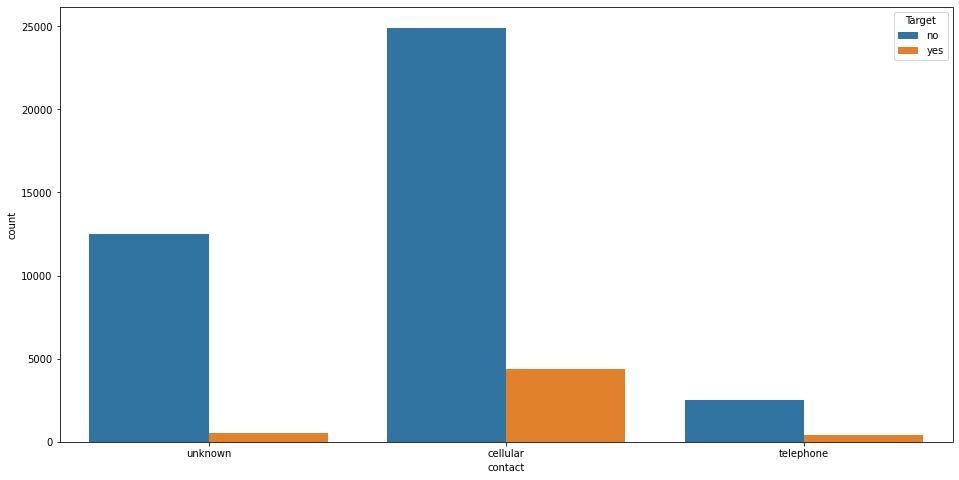

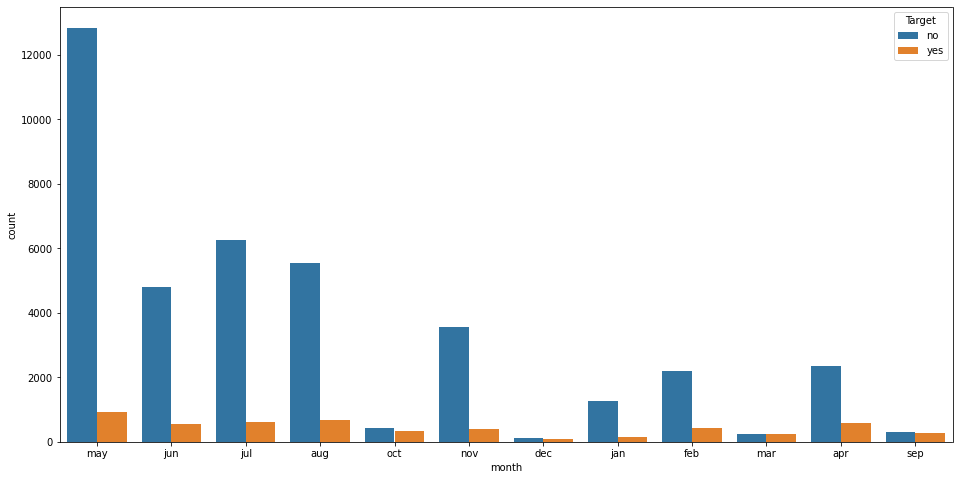

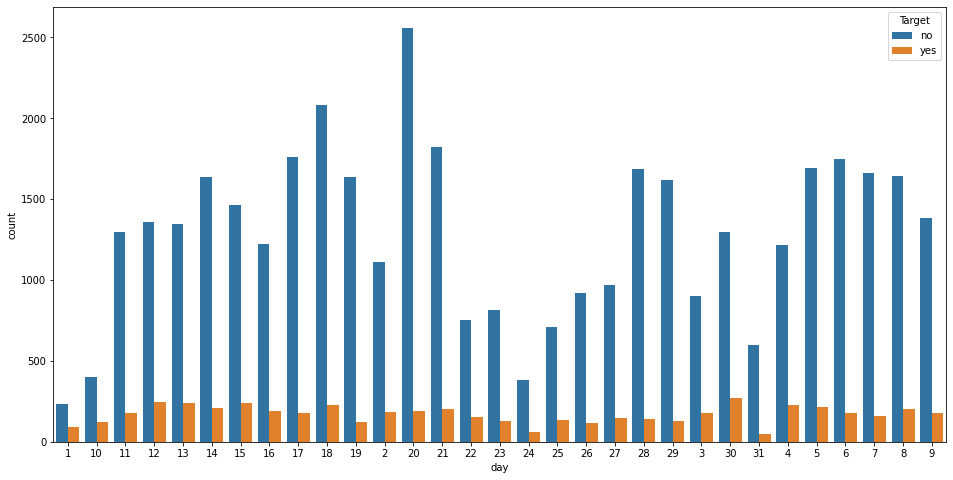

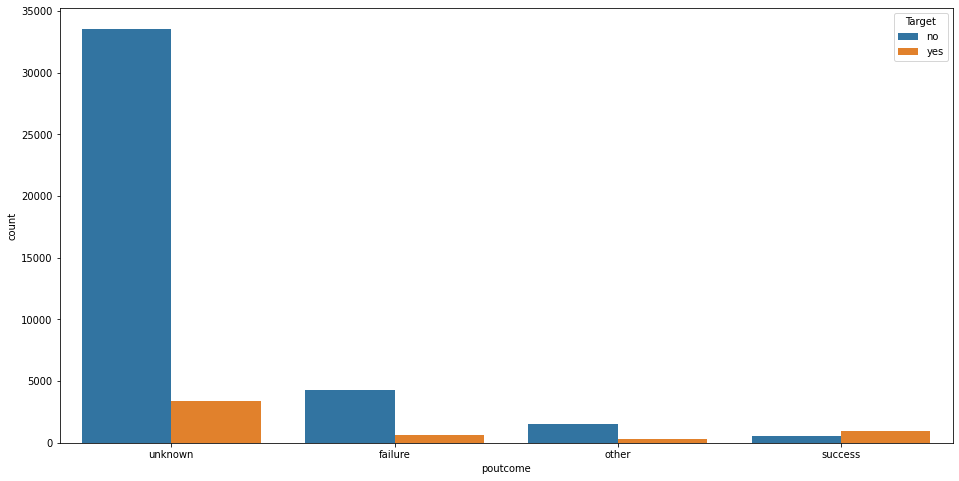

In [30]:
previous_data_cols = ['contact', 'month', 'day', 'poutcome']
for col in previous_data_cols:
    plt.figure(figsize=(16, 8))
    sns.countplot(data[col], hue=data['Target'])
    plt.show()

In [31]:
previous_data_cols = ['contact', 'month', 'day', 'poutcome']
for col in previous_data_cols:
    print("------------{}-------------".format(col))
    print(pd.crosstab(data[col], data['Target'], normalize='index'))

------------contact-------------
Target           no       yes
contact                      
cellular   0.850811  0.149189
telephone  0.865795  0.134205
unknown    0.959293  0.040707
------------month-------------
Target        no       yes
month                     
apr     0.803206  0.196794
aug     0.889867  0.110133
dec     0.532710  0.467290
feb     0.833522  0.166478
jan     0.898788  0.101212
jul     0.909065  0.090935
jun     0.897772  0.102228
mar     0.480084  0.519916
may     0.932805  0.067195
nov     0.898489  0.101511
oct     0.562331  0.437669
sep     0.535406  0.464594
------------day-------------
Target        no       yes
day                       
1       0.720497  0.279503
10      0.769084  0.230916
11      0.877620  0.122380
12      0.847785  0.152215
13      0.847950  0.152050
14      0.886364  0.113636
15      0.860247  0.139753
16      0.864311  0.135689
17      0.909232  0.090768
18      0.901213  0.098787
19      0.930563  0.069437
2       0.859242  0.140758
2

### Observations on previous contact categorical values vs. Target
### All predictors have values that influence Target.
### Thus nothing to remove in these predictors

## Bivariate analysis between the categorical predictors

In [32]:
cat_cols

[&#39;job&#39;,
 &#39;marital&#39;,
 &#39;education&#39;,
 &#39;default&#39;,
 &#39;housing&#39;,
 &#39;loan&#39;,
 &#39;contact&#39;,
 &#39;day&#39;,
 &#39;month&#39;,
 &#39;poutcome&#39;,
 &#39;Target&#39;]

In [33]:
pd.crosstab(data['job'], data['marital'], normalize='index')

marital        divorced   married    single
job                                        
admin.         0.145040  0.520789  0.334171
blue-collar    0.077065  0.715988  0.206946
entrepreneur   0.120377  0.719570  0.160054
housemaid      0.148387  0.735484  0.116129
management     0.117467  0.570945  0.311588
retired        0.187721  0.764576  0.047703
self-employed  0.088664  0.628879  0.282457
services       0.132162  0.579442  0.288397
student        0.006397  0.057569  0.936034
technician     0.121759  0.533368  0.344873
unemployed     0.131236  0.561013  0.307751
unknown        0.059028  0.704861  0.236111

In [34]:
pd.crosstab(data['default'], data['housing'], normalize='index')

housing        no       yes
default                    
no       0.443756  0.556244
yes      0.466258  0.533742

In [36]:
pd.crosstab(data['default'], data['loan'], normalize='index')

loan           no       yes
default                    
no       0.843612  0.156388
yes      0.630675  0.369325

In [37]:
pd.crosstab(data['marital'], data['education'], normalize='index')

education   primary  secondary  tertiary   unknown
marital                                           
divorced   0.144421   0.540618  0.282504  0.032456
married    0.192768   0.505990  0.258617  0.042625
single     0.066693   0.517357  0.374668  0.041282

In [38]:
pd.crosstab(data['loan'], data['housing'], normalize='index')

housing        no       yes
loan                       
no       0.453130  0.546870
yes      0.397156  0.602844

### Observation - 
### Seems like default and housing are correlated. 
### Lets check both with respect to Target. 

In [39]:
pd.crosstab(data['default'], data['Target'], normalize='index')

Target         no       yes
default                    
no       0.882039  0.117961
yes      0.936196  0.063804

In [40]:
pd.crosstab(data['housing'], data['Target'], normalize='index')

Target         no       yes
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000

### Observation -
### default and housing affects Target almost identically however not exactly same (88% vs. 83 % for Target=no)
### So we will not remove one of them. 

## Final checkup for all categorical columns with Target

In [41]:
for col in cat_cols:
    print('-------------{}--------------'.format(col))
    cf = pd.crosstab(data[col], data['Target'], normalize='index')
    print(cf)

-------------job--------------
Target               no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056
-------------marital--------------
Target          no       yes
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492
-------------education--------------
Target           no       yes
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064
unknown    0.864297  0.135703
-------------default--------------
Target         no       yes
default                    
no   

### Observation - 
### We can drop 'marital' since the proportion of yes/no are same for various marital status.

In [42]:
data.drop('marital', axis=1, inplace=True)
cat_cols.remove('marital')
cat_cols

[&#39;job&#39;,
 &#39;education&#39;,
 &#39;default&#39;,
 &#39;housing&#39;,
 &#39;loan&#39;,
 &#39;contact&#39;,
 &#39;day&#39;,
 &#39;month&#39;,
 &#39;poutcome&#39;,
 &#39;Target&#39;]

## Target variable with respect to the various continuous variables

In [43]:
data.groupby('Target').median()

age  balance  duration  campaign  pdays  previous
Target                                                   
no       39      417       164         2     -1         0
yes      38      733       426         2     -1         0

### Lets see what is happening with campaign, pdays and previous

&lt;Figure size 1152x576 with 0 Axes&gt;

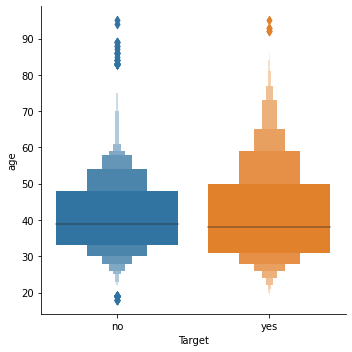

&lt;Figure size 1152x576 with 0 Axes&gt;

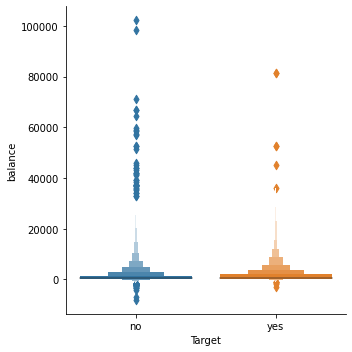

&lt;Figure size 1152x576 with 0 Axes&gt;

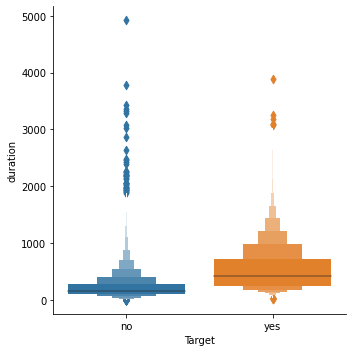

&lt;Figure size 1152x576 with 0 Axes&gt;

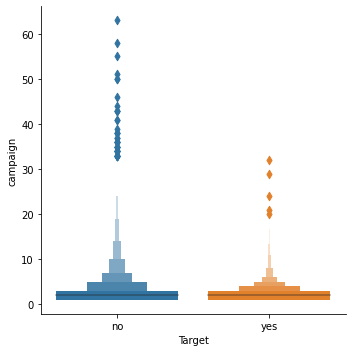

&lt;Figure size 1152x576 with 0 Axes&gt;

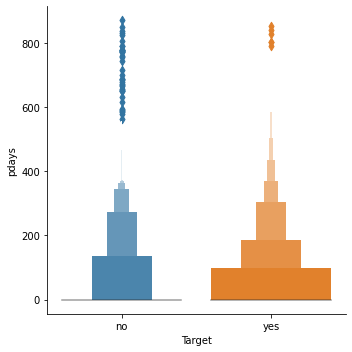

&lt;Figure size 1152x576 with 0 Axes&gt;

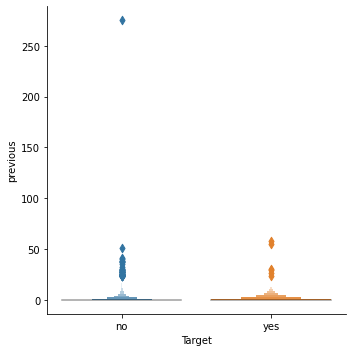

In [44]:
for col in ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']:
    plt.figure(figsize=(16, 8))
    sns.catplot(x='Target', y=col, data=data, kind='boxen')
    plt.show()


### Observations
### Since all values have some distributions for both Yes and No, we will keep the continuous predictors.

## Conclusion of analysis
### 1. We dropped 'marital' status
### 2. We can try dropping 'default'
### 3. We can try binning the 'balance', 'pdays' and 'previous' to treat outliers better.
### 4. We can also try binning 'campaign' and 'duration'
### 5. First we will fit a linear model without the modifications and then try to improve it.

## Model preparation and evaluation

### 1. Logisitc Regression Model

In [45]:
X = data.drop('Target', axis=1)
Y = data[['Target']]
X.shape, Y.shape

((45211, 15), (45211, 1))

In [46]:
#X = pd.get_dummies(X)
X.head(10)

age           job  education default  balance housing loan  contact day  \
0   58    management   tertiary      no     2143     yes   no  unknown   5   
1   44    technician  secondary      no       29     yes   no  unknown   5   
2   33  entrepreneur  secondary      no        2     yes  yes  unknown   5   
3   47   blue-collar    unknown      no     1506     yes   no  unknown   5   
4   33       unknown    unknown      no        1      no   no  unknown   5   
5   35    management   tertiary      no      231     yes   no  unknown   5   
6   28    management   tertiary      no      447     yes  yes  unknown   5   
7   42  entrepreneur   tertiary     yes        2     yes   no  unknown   5   
8   58       retired    primary      no      121     yes   no  unknown   5   
9   43    technician  secondary      no      593     yes   no  unknown   5   

  month  duration  campaign  pdays  previous poutcome  
0   may       261         1     -1         0  unknown  
1   may       151         1     -1         0  unknown  
2   may        76         1     -1         0  unknown  
3   may        92         1     -1         0  unknown  
4   may       198         1     -1         0  unknown  
5   may       139         1     -1         0  unknown  
6   may       217         1     -1         0  unknown  
7   may       380         1     -1         0  unknown  
8   may        50         1     -1         0  unknown  
9   may        55         1     -1         0  unknown

### Since the Target is yes/no, use LabelEncoder to make it numeric 1/0.

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
Y = Y.reshape((len(Y), 1))
print(Y.shape)
Y

(45211, 1)


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((31647, 15), (13564, 15), (31647, 1), (13564, 1))

### Scale and get_dummies for X_train and X_test. 
### The scaling is done separately so that the Training data does not have knowledge of Test data.
### This prevents data leakage.

In [49]:
scaler = RobustScaler()
X_conts = X_train[cont_cols]
scaler.fit(X_conts)
X_conts_scaled = scaler.transform(X_conts)
X_train_scaled = X_train.copy()
X_train_scaled[cont_cols] = X_conts_scaled

X_conts = X_test[cont_cols]
X_conts_scaled = scaler.transform(X_conts)
X_test_scaled = X_test.copy()
X_test_scaled[cont_cols] = X_conts_scaled

X_train_scaled.head(10)
X_test_scaled.head(10)

age          job  education default   balance housing loan  \
33177 -0.200000  blue-collar  secondary      no -0.076753     yes   no   
1544  -0.400000   unemployed  secondary      no -0.203690      no   no   
44480  2.666667      retired  secondary      no  0.131365      no   no   
17886 -0.866667       admin.  secondary     yes -0.365314      no  yes   
12505 -0.600000     services  secondary     yes -0.334317      no  yes   
15671  0.333333  blue-collar    primary      no  1.488561      no   no   
10562  1.000000  blue-collar    primary      no -0.334317      no   no   
43620  2.733333      retired    primary      no -0.219926      no   no   
37517  0.333333     services  secondary      no  3.235424     yes   no   
37826  0.400000  blue-collar  secondary      no  0.405904     yes   no   

         contact day month  duration  campaign  pdays  previous poutcome  
33177   cellular  20   apr  0.856481      -0.5    0.0       0.0  unknown  
1544     unknown   8   may -0.486111       1.0    0.0       0.0  unknown  
44480  telephone   9   aug  1.203704       1.5  183.0       3.0  failure  
17886   cellular  30   jul  0.578704       0.5    0.0       0.0  unknown  
12505    unknown   2   jul -0.393519       0.5    0.0       0.0  unknown  
15671  telephone  21   jul -0.745370      -0.5    0.0       0.0  unknown  
10562    unknown  16   jun -0.365741       2.0    0.0       0.0  unknown  
43620  telephone   4   may  0.134259      -0.5   54.0       3.0  success  
37517   cellular  13   may  0.666667       0.5    0.0       0.0  unknown  
37826   cellular  14   may  1.222222      -0.5    0.0       0.0  unknown

In [50]:
X_train = pd.get_dummies(X_train_scaled, drop_first=True)
X_test = pd.get_dummies(X_test_scaled, drop_first=True)
print(X_train.shape, X_test.shape)

(31647, 69) (13564, 69)


## Start evaluating models

In [51]:
scores = dict()

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score, roc_auc_score
def acc_and_cm(actual, predict):
    print('Accuracy: {}'.format(accuracy_score(actual, predict)))
    cm = confusion_matrix(actual, predict)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Accuracy: 0.9051164848127397


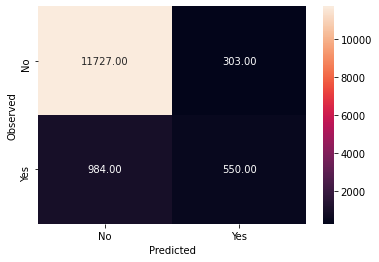

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=7)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
#print("Accuracy: {} Precision: {} Recall: {}".format(accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred)))
acc_and_cm(Y_test, Y_pred)
scores['Logistic Regression'] = [accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), roc_auc_score(Y_test, Y_pred)]

Accuracy: 0.9023149513417871


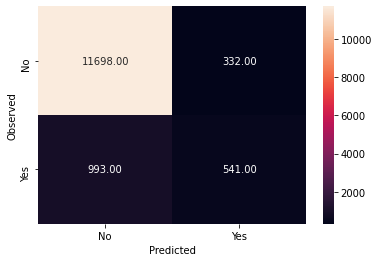

In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=7)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
#print("Accuracy: {} Precision: {} Recall: {}".format(accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred)))
acc_and_cm(Y_test, Y_pred)
scores['Decision Tree'] = [accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), roc_auc_score(Y_test, Y_pred)]

Accuracy: 0.906664700678266


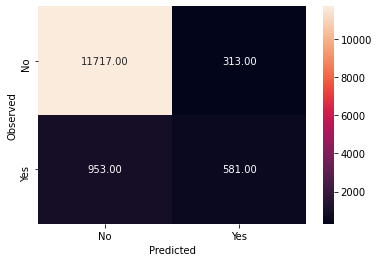

Accuracy: 0.9016514302565615


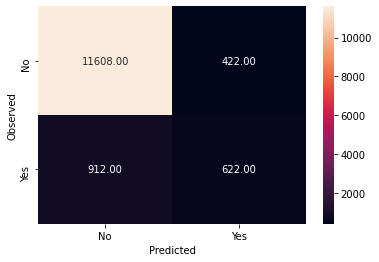

Accuracy: 0.9029784724270127


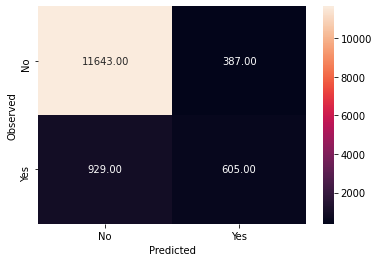

Accuracy: 0.9076968445886169


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = (
    ('Random Forest', RandomForestClassifier(random_state=7)), 
    ('Bagging', BaggingClassifier(random_state=7)), 
    ('AdaBoost', AdaBoostClassifier(random_state=7)), 
    ('Gradient Boosting', GradientBoostingClassifier(random_state=7))
    )
for algo in models:
    name, model = algo
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    #print("Model : {} Accuracy: {} Precision: {} Recall: {}".format(name, accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred)))
    acc_and_cm(Y_test, Y_pred)
    scores[name] = [accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), roc_auc_score(Y_test, Y_pred)]

## Make a dataframe for comparison


In [56]:
results = pd.DataFrame.from_dict(scores, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC AUC score'])
results

Accuracy  Precision    Recall  F1 score  ROC AUC score
Logistic Regression  0.905116   0.644783  0.358540  0.460829       0.666676
Decision Tree        0.902315   0.619702  0.352673  0.449522       0.662538
Random Forest        0.906665   0.649888  0.378748  0.478583       0.676365
Bagging              0.901651   0.595785  0.405476  0.482545       0.685198
AdaBoost             0.902978   0.609879  0.394394  0.479018       0.681112
Gradient Boosting    0.907697   0.647490  0.403520  0.497189       0.687753

### According to the business problem, we need to improve the recall. 
### The best F1-score we have is with Gradient Boosting and best recall with Bagging.

## Model improvement

### First try to adjust hyperparameters of the two algorithms
### Caution - the next few cells will take time, about 2 mins for the cells with GridSearchCV.

In [57]:
from sklearn.model_selection import GridSearchCV
grid = dict()
grid['max_features'] = [5, 10, 15, 20, 25, 30, 40, 45]
model = GradientBoostingClassifier(random_state=7)
search = GridSearchCV(estimator=model, param_grid=grid, scoring='recall', cv=None)
results = search.fit(X_train, Y_train)
results

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion=&#39;friedman_mse&#39;,
                                                  init=None, learning_rate=0.1,
                                                  loss=&#39;deviance&#39;, max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_cha

In [58]:
results.cv_results_['mean_test_score']

array([0.25193076, 0.36005326, 0.37869507, 0.38002663, 0.38961385,
       0.38828229, 0.39467377, 0.38748336])

### Did not see much improvement with Grid Search on max_features.

### Lets try Bagging with varying no. of estimators (10 is default)

In [59]:
model = BaggingClassifier(random_state=7)
grid = dict()
grid['n_estimators'] = [12, 15, 20, 25, 30]
search = GridSearchCV(estimator=model, param_grid=grid, scoring='recall', cv=None)
results = search.fit(X_train, Y_train)
results

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=7,
                                         verbose=0, warm_start=False),
             iid=&#39;deprecated&#39;, n_jobs=None,
             param_grid={&#39;n_estimators&#39;: [12, 15, 20, 25, 30]},
             pre_dispatch=&#39;2*n_jobs&#39;, refit=True, return_train_score=False,
             scoring=&#39;recall&#39;, verbose=0)

In [60]:
results.cv_results_['mean_test_score']

array([0.41411451, 0.46258322, 0.42370173, 0.45778961, 0.4391478 ])

### Bagging with n_estimators=15 improved the recall from below 0.40.

In [63]:
model = BaggingClassifier(n_estimators=15, random_state=7)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
acc_and_cm(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9021675022117369


              precision    recall  f1-score   support

           0       0.93      0.96      0.95     12030
           1       0.58      0.47      0.52      1534

    accuracy                           0.90     13564
   macro avg       0.76      0.71      0.73     13564
weighted avg       0.89      0.90      0.90     13564



### Print which features are important

In [65]:
model = RandomForestClassifier(random_state=7)
model.fit(X_train, Y_train)
importances = model.feature_importances_
features = X_train.columns
df = pd.DataFrame(importances, index=features, columns=['importance'])
df.sort_values('importance', ascending=False).head(20)

importance
duration               0.257308
age                    0.093697
balance                0.093591
poutcome_success       0.056569
campaign               0.038570
pdays                  0.038130
housing_yes            0.022470
previous               0.019924
contact_unknown        0.013687
education_secondary    0.012974
month_mar              0.012936
education_tertiary     0.011471
job_technician         0.011204
job_management         0.011175
month_jun              0.010763
month_oct              0.010495
month_may              0.009824
loan_yes               0.009742
job_blue-collar        0.009525
month_aug              0.009375

### Select few top features and save them. Later we will try modeling with these. 

In [66]:
selected_features = df[df['importance'] > 0.01].index
selected_features

Index([&#39;age&#39;, &#39;balance&#39;, &#39;duration&#39;, &#39;campaign&#39;, &#39;pdays&#39;, &#39;previous&#39;,
       &#39;job_management&#39;, &#39;job_technician&#39;, &#39;education_secondary&#39;,
       &#39;education_tertiary&#39;, &#39;housing_yes&#39;, &#39;contact_unknown&#39;, &#39;month_jun&#39;,
       &#39;month_mar&#39;, &#39;month_oct&#39;, &#39;poutcome_success&#39;],
      dtype=&#39;object&#39;)

## Lets try unscaled data since Tree algorithms can handle unscaled data

In [69]:
newdata = pd.read_csv('bank-full.csv')
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
newdata[cat_cols] = newdata[cat_cols].astype('category')
print(newdata.dtypes)
X = newdata.drop('Target', axis=1)
X = pd.get_dummies(X, drop_first=True)
Y = newdata[['Target']]
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
Y = Y.reshape((len(Y), 1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target         object
dtype: object


((31647, 42), (13564, 42), (31647, 1), (13564, 1))

In [68]:
X_train.head(5)
X_test.head(5)

age  balance  day  duration  campaign  pdays  previous  \
33177   36      349   20       365         1     -1         0   
1544    33      177    8        75         4     -1         0   
44480   79      631    9       440         5    182         3   
17886   26      -42   30       305         3     -1         0   
12505   30        0    2        95         3     -1         0   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jul  \
33177                1                 0              0  ...          0   
1544                 0                 0              0  ...          0   
44480                0                 0              0  ...          0   
17886                0                 0              0  ...          1   
12505                0                 0              0  ...          1   

       month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
33177          0          0          0          0          0          0   
1544           0          0          1          0          0          0   
44480          0          0          0          0          0          0   
17886          0          0          0          0          0          0   
12505          0          0          0          0          0          0   

       poutcome_other  poutcome_success  poutcome_unknown  
33177               0                 0                 1  
1544                0                 0                 1  
44480               0                 0                 0  
17886               0                 0                 1  
12505               0                 0                 1  

[5 rows x 42 columns]

Accuracy: 0.9084340902388676


Accuracy: 0.9023149513417871


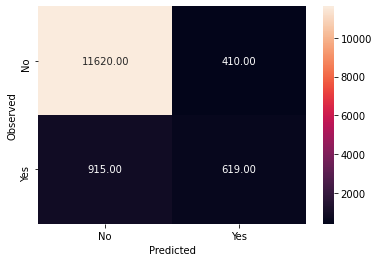

Accuracy: 0.9039368917723385


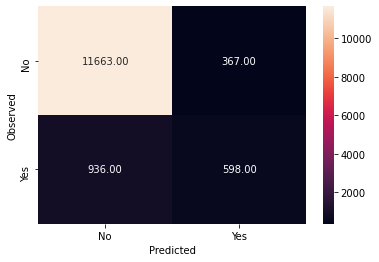

Accuracy: 0.9103509289295193


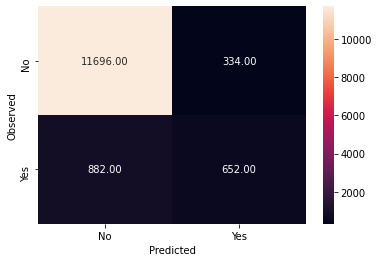

In [70]:
scores = dict()
models = (
    ('Random Forest', RandomForestClassifier(random_state=7)), 
    ('Bagging', BaggingClassifier(random_state=7)), 
    ('AdaBoost', AdaBoostClassifier(random_state=7)), 
    ('Gradient Boosting', GradientBoostingClassifier(random_state=7))
    )
for algo in models:
    name, model = algo
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    #print("Model : {} Accuracy: {} Precision: {} Recall: {}".format(name, accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred)))
    acc_and_cm(Y_test, Y_pred)
    scores[name] = [accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), roc_auc_score(Y_test, Y_pred)]

In [71]:
results = pd.DataFrame.from_dict(scores, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC AUC score'])
results

Accuracy  Precision    Recall  F1 score  ROC AUC score
Random Forest      0.908434   0.659389  0.393742  0.493061       0.683903
Bagging            0.902315   0.601555  0.403520  0.483028       0.684719
AdaBoost           0.903937   0.619689  0.389831  0.478591       0.679662
Gradient Boosting  0.910351   0.661258  0.425033  0.517460       0.698634

### Unscaled data did not help much. 
## Next we will try Feature Selection using the original scaled data.

In [72]:
X_train = pd.get_dummies(X_train_scaled, drop_first=True)
X_test = pd.get_dummies(X_test_scaled, drop_first=True)
print(X_train.shape, X_test.shape)

(31647, 69) (13564, 69)


In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, Y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)


In [75]:
model = BaggingClassifier(n_estimators=15, random_state=7)
model.fit(X_train_fs, Y_train)
Y_pred = model.predict(X_test_fs)
print("Recall: {}".format(recall_score(Y_test, Y_pred)))
acc_and_cm(Y_test, Y_pred)

Recall: 0.4654498044328553
Accuracy: 0.9021675022117369


## Final trial - Use the selected_features and fit the ensemble models.

In [77]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Accuracy: 0.9026098496018874


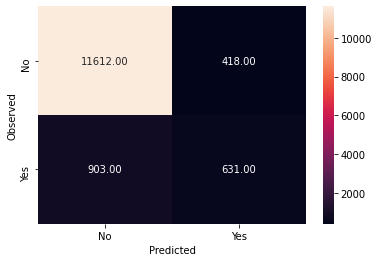

Accuracy: 0.8977440283102329


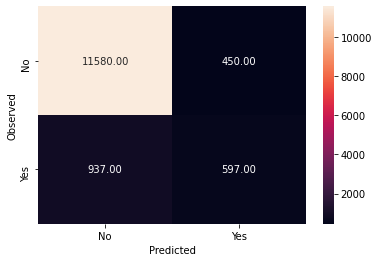

Accuracy: 0.9031259215570628


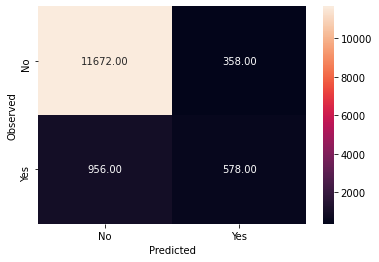

Accuracy: 0.9084340902388676


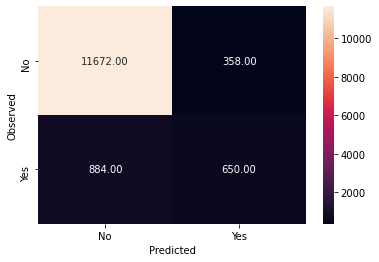

In [78]:
scores = dict()
models = (
    ('Random Forest', RandomForestClassifier(random_state=7)), 
    ('Bagging', BaggingClassifier(random_state=7)), 
    ('AdaBoost', AdaBoostClassifier(random_state=7)), 
    ('Gradient Boosting', GradientBoostingClassifier(random_state=7))
    )
for algo in models:
    name, model = algo
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    #print("Model : {} Accuracy: {} Precision: {} Recall: {}".format(name, accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred)))
    acc_and_cm(Y_test, Y_pred)
    scores[name] = [accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), roc_auc_score(Y_test, Y_pred)]


In [79]:
results = pd.DataFrame.from_dict(scores, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC AUC score'])
results

Accuracy  Precision    Recall  F1 score  ROC AUC score
Random Forest      0.902610   0.601525  0.411343  0.488579       0.688298
Bagging            0.897744   0.570201  0.389179  0.462611       0.675886
AdaBoost           0.903126   0.617521  0.376793  0.468016       0.673517
Gradient Boosting  0.908434   0.644841  0.423729  0.511408       0.696985

## Conclusion 
### We could achieve the best result with Bagging with n_estimators=15. 
### The recall can be improved further possibly by treating the outliers. 
### Some of the columns with outliers can be binned and converted to Ordinal for better classification predictors.
### But I stop here till I learn more advanced techniques. 